<a href="https://colab.research.google.com/github/eTcilopp/temp_python_intro_course_gb/blob/master/probability_theory/homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа 4
## Задача 1. Случайная непрерывная величина A имеет равномерное распределение на промежутке (200, 800]. Найдите ее среднее значение и дисперсию.

Решение.
Воспользуемся формулой расчета среднего значения для случайной непрерывной величины:
$$\mu = \frac{a+b}{2}=\frac{200+800}{2}$$
Для расчета дисперсии воспользуемся формулой
$$D=\frac{(b-a)^2}{12}$$

In [ ]:
def get_mu(a, b):
  return (a+b)/2
mu = get_mu(200, 800)
d = (200+800)/12
print(f'среднее значение равно {mu}\n'
      f'дисперсия равна {d}')

среднее значение равно 500.0
дисперсия равна 83.33333333333333


## Задача 2. О случайной непрерывной равномерно распределенной величине B известно, что ее дисперсия равна 0.2.<br> Можно ли найти правую границу величины B и ее среднее значение зная, что левая граница равна 0.5?<br> Если да, найдите ее.

Решение.
Воспользуемся формулой расчета дисперсии случайной непрерывной величины
$$D=\frac{(b-a)^2}{12}$$
Отсюда искомая правая граница b
$$b=\sqrt{12\cdot D}+a = \sqrt{12*0.2}+0.5$$
Среднее значение найдем по формуле
$$\mu = \frac{a+b}{2}$$



In [ ]:
b=(12*0.2)**0.5+0.5
mu = get_mu(0.5, b)
print(f'Правая граница величины B: {b}\n'
      f'Среднее значение величины B: {mu}')

Правая граница величины B: 2.049193338482967
Среднее значение величины B: 1.2745966692414834


## Задача 3. <br>Непрерывная случайная величина X распределена нормально и задана плотностью распределения <br>f(x) = (1 / (4 * sqrt(2pi))) * exp((-(x+2)**2) / 32)<br>

Найдите:<br>
а). M(X)<br>
б). D(X)<br>
в). std(X) (среднее квадратичное отклонение)

Решение
Имеем функцию плотности распределения вероятностей для нормального распределения
$$f(x)=\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-a)^2}{2\sigma^2}}=\frac{1}{4 \sqrt{2\pi}}e^{-\frac{(x+2)^2}{32}}$$
Отсюда
$$\sigma=std(x)=4$$
$$\sigma^2=D(x)=16$$
$$a=M(x)=-2$$



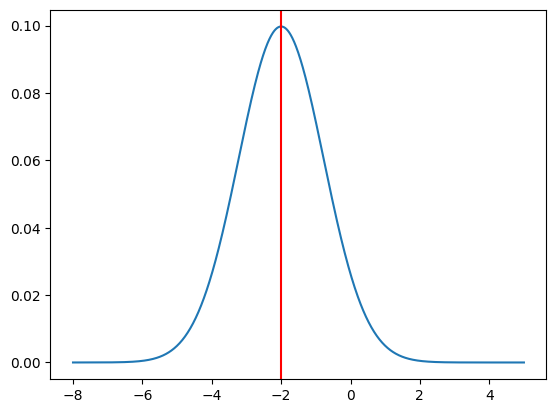

In [ ]:
import numpy as np
import seaborn as sns

def normal_distribution_pdf(x):
    return (1 / (4 * np.sqrt(2 * np.pi))) * np.exp(-((x + 2) ** 2) / 3)

x = np.linspace(-8, 5, 1000)
y = normal_distribution_pdf(x)
ax=sns.lineplot(x=x,y=y)
ax.axvline(-2, color='red')


## Задача 4<br>
Рост взрослого населения города X имеет нормальное распределение.<br>
Причем, средний рост равен 174 см, а среднее квадратичное отклонение равно 8 см.<br>

Какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:<br>
а). больше 182 см<br>
б). больше 190 см<br>
в). от 166 см до 190 см<br>
г). от 166 см до 182 см<br>
д). от 158 см до 190 см<br>
е). не выше 150 см или не ниже 190 см<br>
ё). не выше 150 см или не ниже 198 см<br>
ж). ниже 166 см.

Решение<br>
а) Получим  z-оценку для роста 182 см
$$z=\frac{x-\mu}{\sigma}$$



In [10]:
def get_z_score(x, mu, sigma):
  return (x-mu)/sigma

AVERAGE_HEIGHT = 174
SIGMA = 8
z_182 = get_z_score(182, AVERAGE_HEIGHT, SIGMA)
print(f'z-оценка для роста 182 см = {z_182}')

z-оценка для роста 182 см = 1.0


Далее, определим вероятность того, что значение в стандартном нормальном распределении меньше или равно z

In [11]:
from scipy.stats import norm

def probability_from_z_score(z_score):
    return norm.cdf(z_score)
p_182 = probability_from_z_score(z_182)
print('вероятность того, что значение в стандартном нормальном'
      f' распределении меньше или равно {z_182} = {p_182}')

вероятность того, что значение в стандартном нормальном распределении меньше или равно 1.0 = 0.8413447460685429


Соответственно, вероятность того, что что случайным образом выбранный взрослый человек имеет рост больше 182 см равна

In [14]:
p_higher_than_182 = 1 - p_182
print(f'Вероятность того, что что случайным образом выбранный взрослый '
      f'человек имеет рост больше 182 см равна {p_higher_than_182:0.3f}')

Вероятность того, что что случайным образом выбранный взрослый человек имеет рост больше 182 см равна 0.159


Аналогично можно решить остальные задачи. Для простоты составим функцию, определяющую вероятность больше или меньше определенной величины:

In [19]:
def get_probability(average_height, sigma, more_or_less, value):
    z_score = (value-average_height)/sigma
    less_probability = norm.cdf(z_score)
    if more_or_less.lower() == 'more':
      return 1-less_probability
    return less_probability


Перепроверим решение задачи а)

In [21]:
print('Вероятность того, что что случайным образом выбранный взрослый '
      'человек имеет рост больше 182 см равна '
      f'{get_probability(AVERAGE_HEIGHT, SIGMA, "more", 182):0.3f}')

Вероятность того, что что случайным образом выбранный взрослый человек имеет рост больше 182 см равна 0.159


Ответ сошелся.
Решаем задачу б). больше 190 см

In [29]:
print('Вероятность того, что что случайным образом выбранный взрослый '
      'человек имеет рост больше 190 см равна '
      f'{get_probability(AVERAGE_HEIGHT, SIGMA, "more", 190):0.3f}')

Вероятность того, что что случайным образом выбранный взрослый человек имеет рост больше 190 см равна 0.023


Задача в). от 166 см до 190 см

In [23]:
res = get_probability(AVERAGE_HEIGHT, SIGMA, "less", 190) - get_probability(AVERAGE_HEIGHT, SIGMA, "less", 166)
print('Вероятность того, что что случайным образом выбранный взрослый '
      'человек имеет рост больше 166 см и меньше 190 см равна '
      f'{res:0.3f}')


Вероятность того, что что случайным образом выбранный взрослый человек имеет рост больше 166 см и меньше 190 см равна 0.819


Задача г). от 166 см до 182 см

In [24]:
res = get_probability(AVERAGE_HEIGHT, SIGMA, "less", 182) - get_probability(AVERAGE_HEIGHT, SIGMA, "less", 166)
print('Вероятность того, что что случайным образом выбранный взрослый '
      'человек имеет рост больше 166 см и меньше 182 см равна '
      f'{res:0.3f}')

Вероятность того, что что случайным образом выбранный взрослый человек имеет рост больше 166 см и меньше 182 см равна 0.683


Задача д). от 158 см до 190 см

In [25]:
res = get_probability(AVERAGE_HEIGHT, SIGMA, "less", 190) - get_probability(AVERAGE_HEIGHT, SIGMA, "less", 158)
print('Вероятность того, что что случайным образом выбранный взрослый '
      'человек имеет рост больше 158 см и меньше 190 см равна '
      f'{res:0.3f}')

Вероятность того, что что случайным образом выбранный взрослый человек имеет рост больше 158 см и меньше 190 см равна 0.954


Задача е). не выше 150 см или не ниже 190 см

In [26]:
res = 1-(get_probability(AVERAGE_HEIGHT, SIGMA, "less", 190) - get_probability(AVERAGE_HEIGHT, SIGMA, "less", 150))
print('Вероятность того, что что случайным образом выбранный взрослый '
      'человек имеет рост не больше 158 см или не меньше 190 см равна '
      f'{res:0.3f}')

Вероятность того, что что случайным образом выбранный взрослый человек имеет рост не больше 158 см или не меньше 190 см равна 0.024


Задача ё). не выше 150 см или не ниже 198 см

In [27]:
res = 1-(get_probability(AVERAGE_HEIGHT, SIGMA, "less", 198) - get_probability(AVERAGE_HEIGHT, SIGMA, "less", 150))
print('Вероятность того, что что случайным образом выбранный взрослый '
      'человек имеет рост не больше 150 см или не меньше 198 см равна '
      f'{res:0.3f}')

Вероятность того, что что случайным образом выбранный взрослый человек имеет рост не больше 150 см или не меньше 198 см равна 0.003


Задача ж). ниже 166 см.

In [28]:
res = get_probability(AVERAGE_HEIGHT, SIGMA, "less", 166)
print('Вероятность того, что что случайным образом выбранный взрослый '
      'человек имеет рост меньше 166 см равна '
      f'{res:0.3f}')

Вероятность того, что что случайным образом выбранный взрослый человек имеет рост меньше 166 см равна 0.159
